## TBD Projekt 2
Zespół 13: 
- Filip Misztal 
- Wiktor Niemirski 
- Stanisław Moska


### Cel projektu
Rozbudowano bibliotekę polars-bio o operację k-merów, zliczającą ich częstość w genomach z plików FASTQ. Implementację przeprowadzono w Rust.

### Imports

In [16]:
import os
from kmer_benchmark import performance_test, visualize_performance_results, get_kmer_results
from polars_bio import visualize_kmers, read_fastq, kmer_count


TEST_FASTQ_PATH = "tests/data/io/fastq/temp.fastq"
SMALL_FASTQ_PATH = "tests/data/io/fastq/example.fastq"
LARGE_FASTQ_PATH = "tests/data/io/fastq/ERR194147.fastq" 
OUTPUT_DIR = "benchmark_results"
FASTQC_RS_OUTPUT = "tests/data/io/fastq/output_big.json"
FASTQC_RS_OUTPUT_K3 = "tests/data/io/fastq/output.json"


INFO:polars_bio:Table: err194147 registered for path: tests/data/io/fastq/ERR194147.fastq
8240796rows [00:17, 475854.97rows/s]


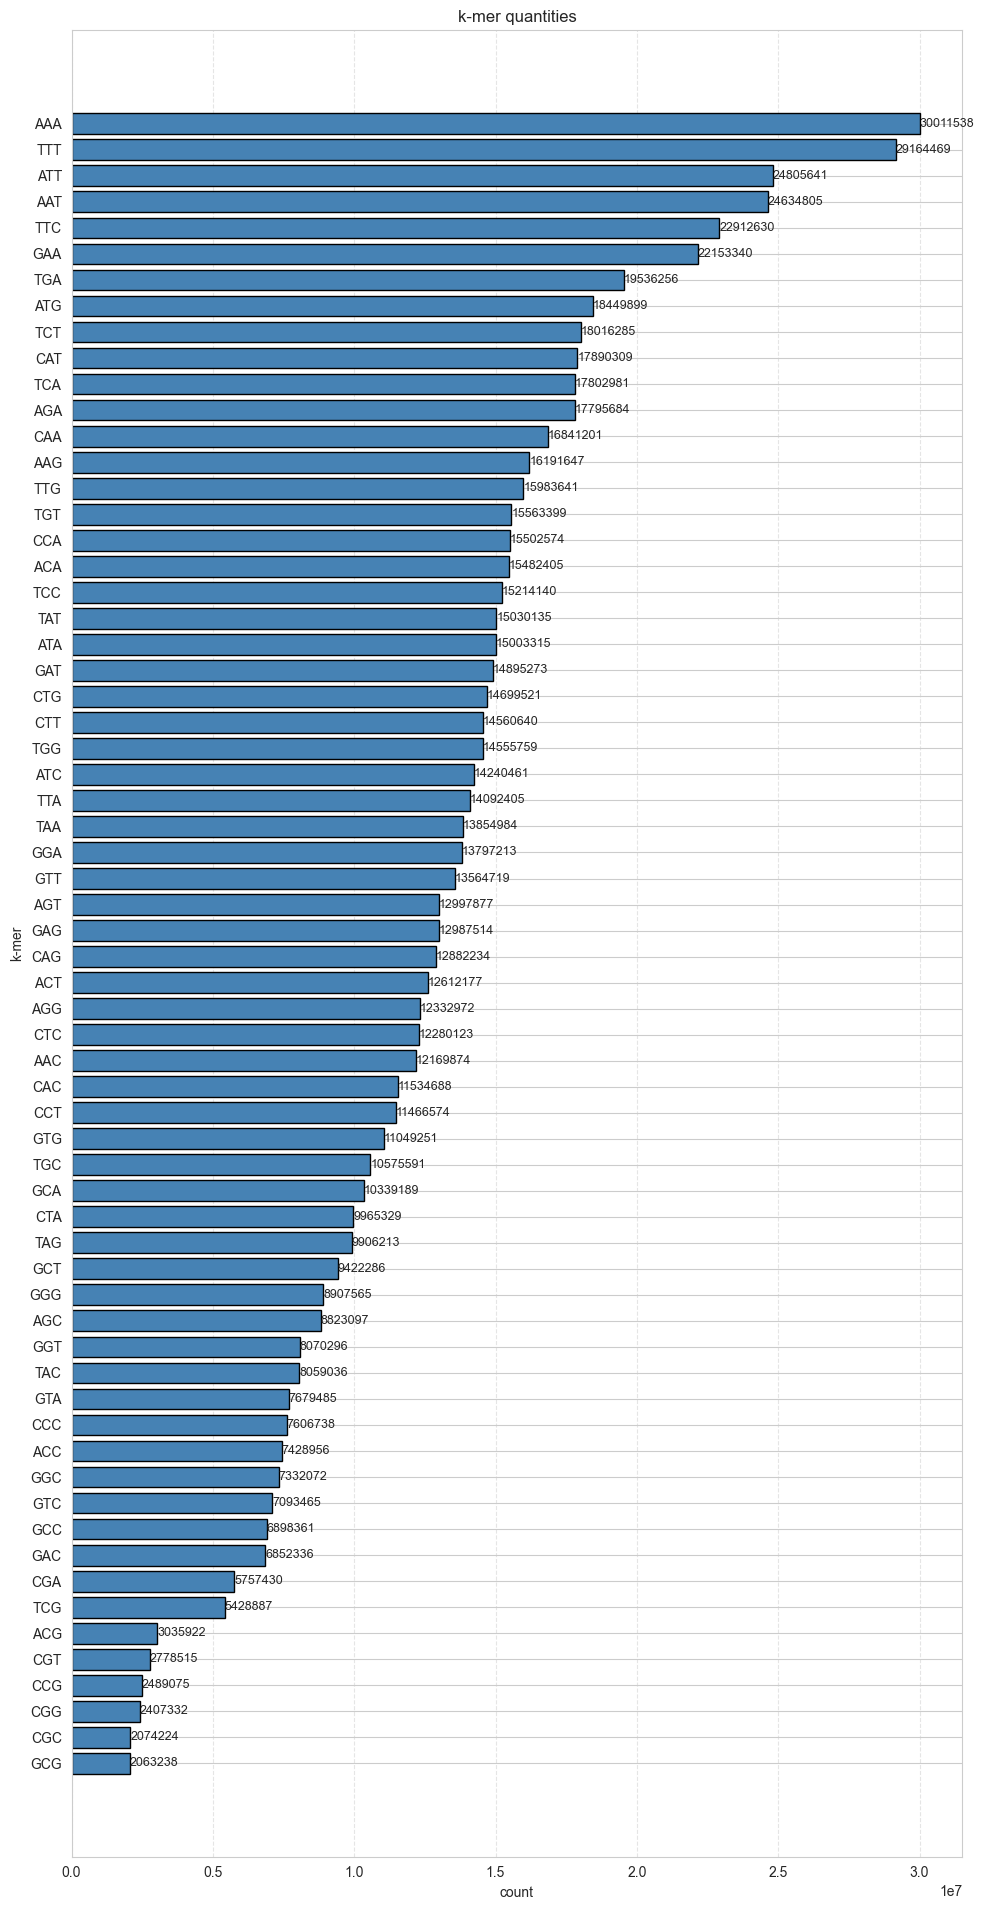

In [17]:
df = read_fastq(LARGE_FASTQ_PATH)
kmer_c = kmer_count(3, df)
visualize_kmers(kmer_c)

### Testy poprawności działania 
Dla przykładowej sekwencji GTAGAGCTGT uruchomiono naszą implementację oraz moduł fastqc-rs. <br>
Wyniki naszej implementacji zgadzały się z wynikiami analitycznymi, natomiast fastqc-rs dawał rozbieżne wyniki. <br>
Wydaje się, że fastqc-rs inaczej interpretuje dane wejściowe. Dlatego dalsze zostały ogranicznone do testów szybkościowych. <br>

In [18]:
print(get_kmer_results(TEST_FASTQ_PATH, k=3))

INFO:polars_bio:Table: temp registered for path: tests/data/io/fastq/temp.fastq
2rows [00:00, 1539.76rows/s]

  kmer  count
0  TGT      1
1  GAG      1
2  AGC      1
3  TAG      1
4  AGA      1
5  GTA      1
6  CTG      1
7  GCT      1


![fast_qc_test](benchmark_results/fastqc_test.webp)

### Testy szybkości działania

INFO:polars_bio:Table: example registered for path: tests/data/io/fastq/example.fastq



Rozpoczynam testy wydajności...

=== Test wydajności ===

Testowanie pliku: example.fastq
  k=3


200rows [00:00, 90326.35rows/s]


1.1470258235931396
  k=5


200rows [00:00, 68871.99rows/s]
INFO:polars_bio:Table: err194147 registered for path: tests/data/io/fastq/ERR194147.fastq


1.170684814453125

Testowanie pliku: ERR194147.fastq
  k=3


8240796rows [00:16, 498940.85rows/s]


24.175953149795532
  k=5


8240796rows [00:16, 496289.51rows/s]


23.711853742599487
Zapisano wyniki wydajności do benchmark_results/performance_results.csv

Generuję wykresy wydajności...


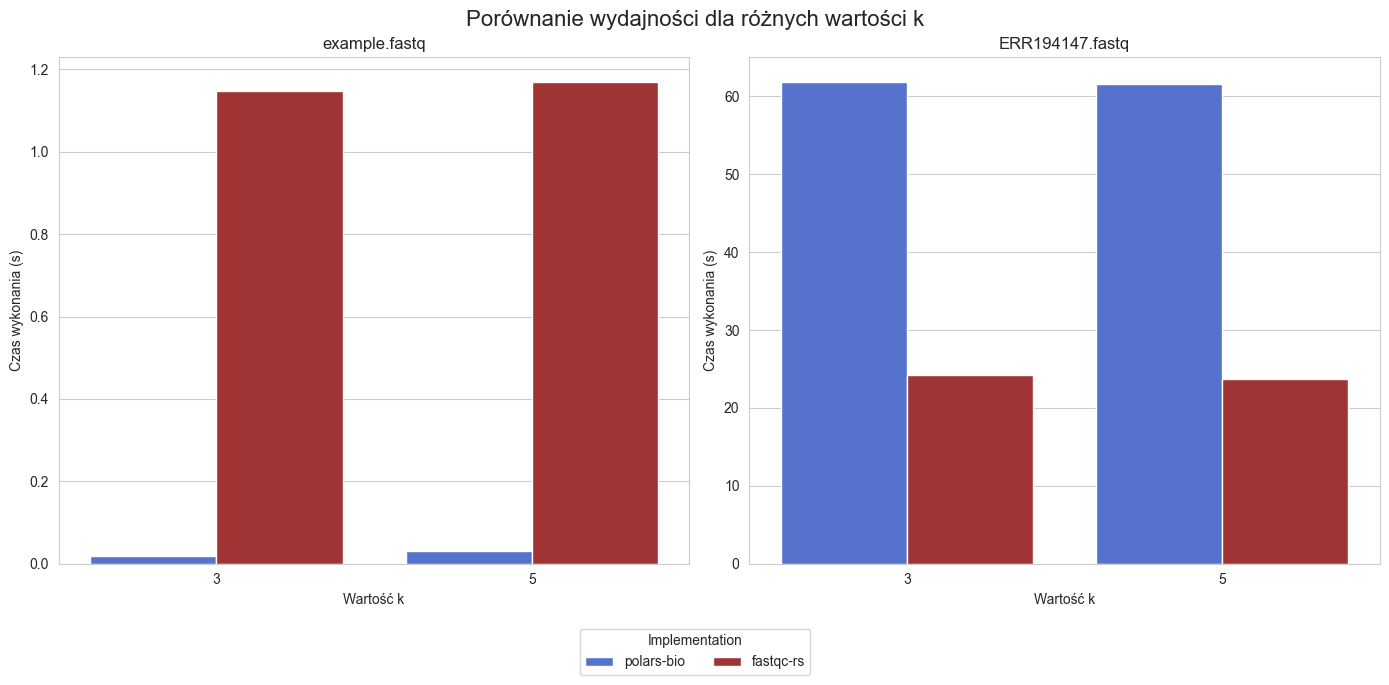

In [20]:
print("\nRozpoczynam testy wydajności...")
performance_results = performance_test(
    fastq_paths=[SMALL_FASTQ_PATH, LARGE_FASTQ_PATH],
    k_values=[3,5],
    include_fastqc_rs=True
)
results_path = os.path.join(OUTPUT_DIR, "performance_results.csv")
performance_results.to_csv(results_path, index=False)
print(f"Zapisano wyniki wydajności do {results_path}")

print("\nGeneruję wykresy wydajności...")
visualize_performance_results(
    performance_results,
    save_path=os.path.join(OUTPUT_DIR, "performance")
)


### Podsumowanie

Zaimplementowana operacja k-merów poprawnie działa dla analitycznie wyznaczonych przykładów. Zauważono pewne rozbieżności w działniu narzędzia fastqc_rs, co może wynikać z innego kodowania merów (postać kanoniczna ?). Sprawdzono zaimplementowaną metodę na dwóch przykładowych zbiorach. Dla małego zbioru nasza implementacje uzyskiwała szybszy czas inferencji niż moduł fastqc_rs, natomiast dla dużych plików FASTQ (~2Gb), pakiet fastqc_rs był szybszy od naszej implementacji. Przeprowadzone testy zostały zaprezentowane na wykresach powyżej. 